In [122]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
np.random.seed(123)

Train/Test Split:

In [123]:
cur_dir = os.getcwd()
digits_path = os.path.join(cur_dir, 'digits/digits.txt')
labels_path = os.path.join(cur_dir, 'digits/labels.txt')

with open(digits_path, 'r') as f:
    digits_data = np.loadtxt(f, dtype=np.float32)

with open(labels_path, 'r') as f:
    labels_data = np.loadtxt(f, dtype=np.uint8)

train_digits, test_digits, train_labels, test_labels = train_test_split(digits_data, labels_data, test_size=0.5, stratify=labels_data, random_state=42)

print(f'Total samples: {len(digits_data)}')
print(f'Training samples: {len(train_digits)}')
print(f'Test samples: {len(test_digits)}')
print(f'Label distribution in training set: {np.bincount(train_labels)}')
print(f'Label distribution in test set: {np.bincount(test_labels)}')

#1)Find mean column-wise, for different features
mean_data = np.mean(digits_data, axis=0)
data_centered = digits_data - mean_data
train_centered = train_digits - mean_data
test_centered = test_digits - mean_data

Total samples: 5000
Training samples: 2500
Test samples: 2500
Label distribution in training set: [230 285 265 250 250 228 231 256 245 260]
Label distribution in test set: [230 286 265 250 250 228 231 256 244 260]


Question #1 PCA

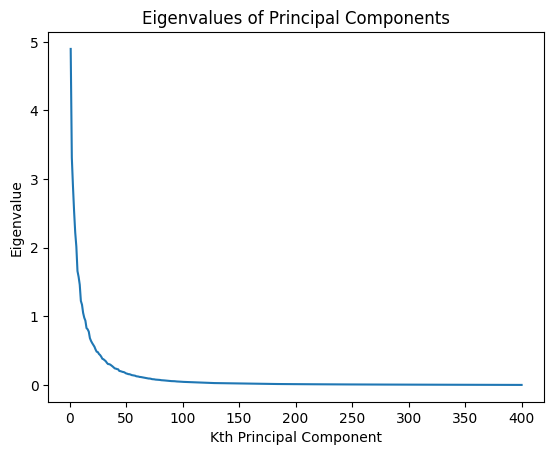

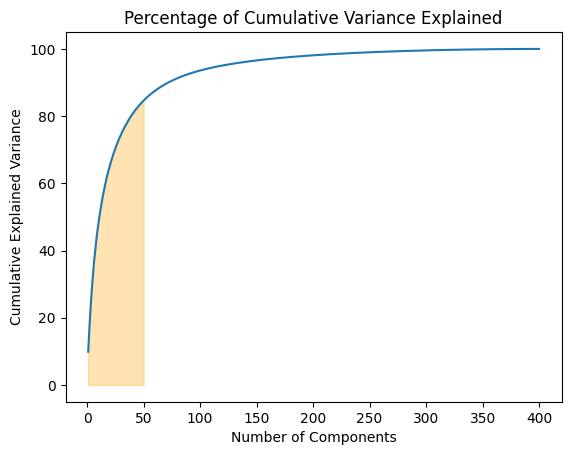

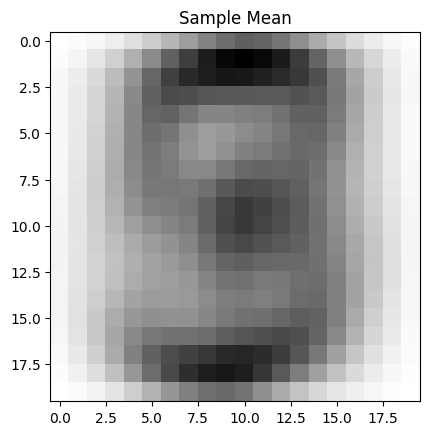

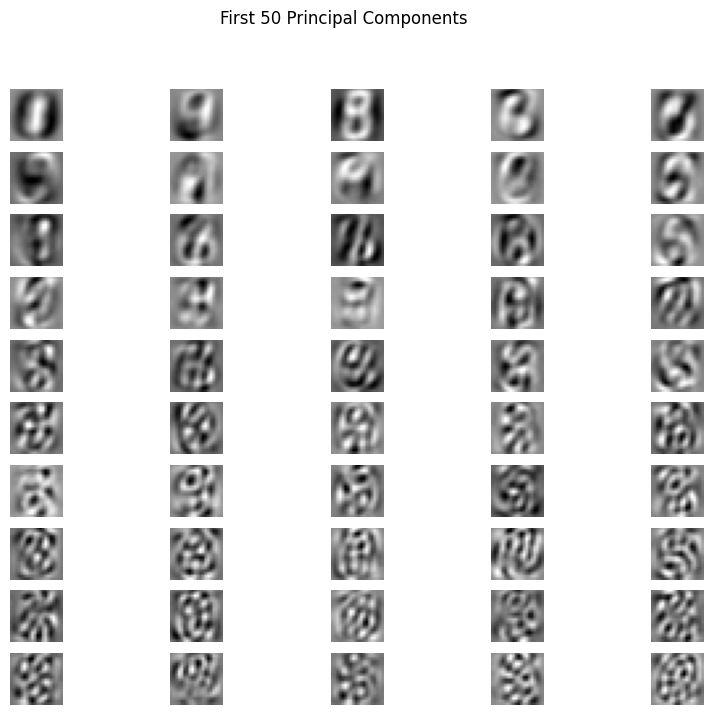

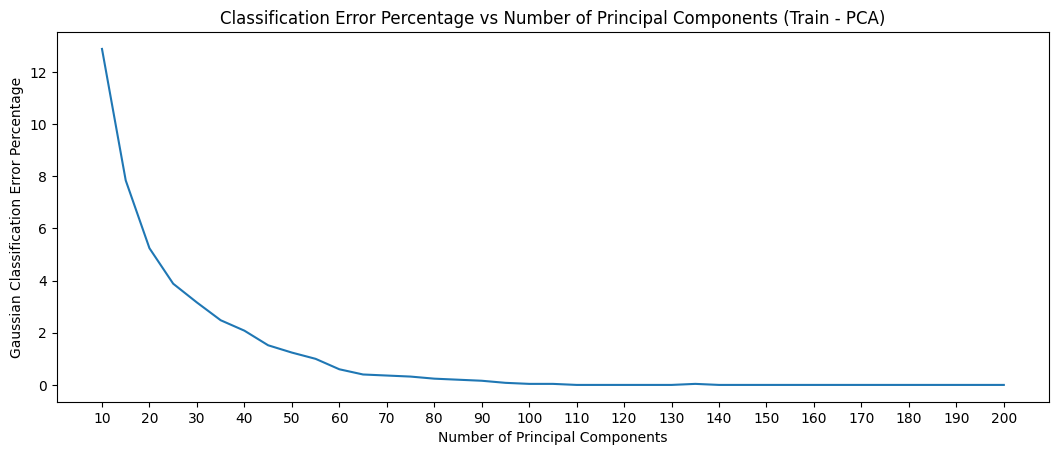

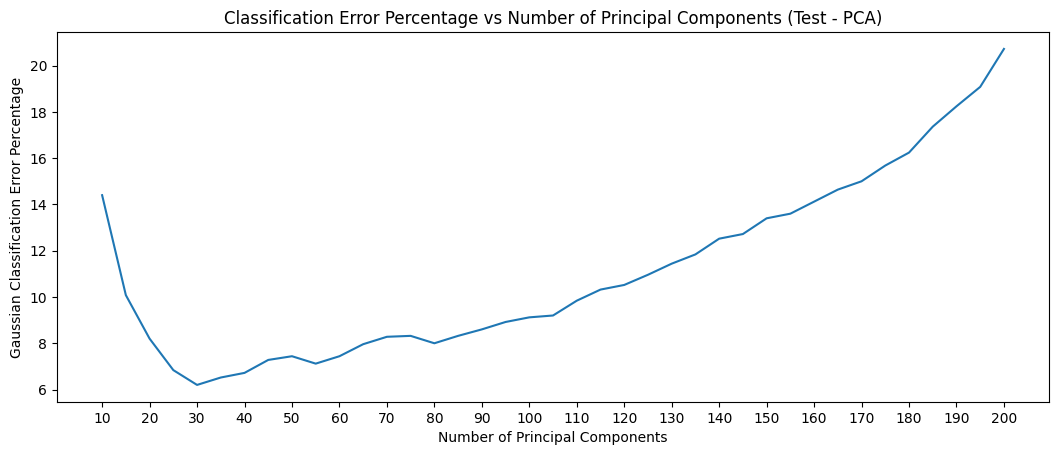

In [124]:
#2)
pca = PCA()
pca.fit(train_centered)

explained_variance_ratio = pca.explained_variance_ratio_
eig_vals = pca.explained_variance_
sorted_eigenvalues = sorted(eig_vals, reverse=True)
plt.plot(range(1,len(eig_vals)+1), sorted_eigenvalues)
plt.xlabel('Kth Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()

cumulative_var_ratio = np.cumsum(explained_variance_ratio)*100
x_axis_pve = range(1,len(cumulative_var_ratio)+1)
threshold = 50#Plot until the first 50 principal components
plt.plot(x_axis_pve, cumulative_var_ratio)
plt.fill_between(x_axis_pve[:threshold], cumulative_var_ratio[:threshold], color='orange', alpha=0.3)  # color the area under the line up to threshold value
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Percentage of Cumulative Variance Explained')
plt.show()

#3) Display sample mean and chosen bases as images
plt.imshow(mean_data.reshape((20, 20)).T, cmap='gray_r')
plt.title('Sample Mean')
plt.show()

num_components = 50
bases = pca.components_[:num_components]
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10, 8))

for i, base in enumerate(bases):
    row = i // 5
    col = i % 5
    base_image = base.reshape((20, 20))
    axes[row, col].imshow(base_image.T, cmap='gray_r')
    axes[row, col].axis('off')
plt.suptitle('First 50 Principal Components')
plt.show()

#4)
subspace_dimensions = range(10, 201, 5) 
pca_train_trans = pca.transform(train_centered)
pca_test_trans = pca.transform(test_centered)

X_train_subspaces = [pca_train_trans[:, :d] for d in subspace_dimensions]
X_test_subspaces = [pca_test_trans[:, :d] for d in subspace_dimensions]
classification_error_train = list()
classification_error_test = list()

for i, d in enumerate(subspace_dimensions):
    train_err = 0
    test_err = 0
    QDA = QuadraticDiscriminantAnalysis()
    QDA.fit(X_train_subspaces[i], train_labels)
    predictions_train = QDA.predict(X_train_subspaces[i])
    predictions_test = QDA.predict(X_test_subspaces[i])

    for i in range(len(predictions_train)):
      if predictions_train[i] != train_labels[i]:
        train_err += 1
    classification_error_train.append(train_err / len(predictions_train))

    for i in range(len(predictions_test)):
      if predictions_test[i] != test_labels[i]:
        test_err += 1
    classification_error_test.append(test_err / len(predictions_test))

#5)  
train_percentage = (np.array(classification_error_train))*100
test_percentage = (np.array(classification_error_test))*100
k_components = [x for x in subspace_dimensions]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 2
plt.rcParams["figure.figsize"] = fig_size

plt.plot(k_components, train_percentage)
plt.xlabel('Number of Principal Components')
plt.ylabel('Gaussian Classification Error Percentage')
plt.title('Classification Error Percentage vs Number of Principal Components (Train - PCA)')
plt.xticks(range(10, 201, 10), range(10, 201, 10))
plt.show()

plt.plot(k_components, test_percentage)
plt.xlabel('Number of Principal Components')
plt.ylabel('Gaussian Classification Error Percentage')
plt.title('Classification Error Percentage vs Number of Principal Components (Test - PCA)')
plt.xticks(range(10, 201, 10), range(10, 201, 10))
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)})  # Default value for figsize


Question #2 Isomap Embedding

In [114]:
subspace_dimensions = range(10, 201, 10) 
class_error_train = list()
class_error_test = list()

for i, d in enumerate(subspace_dimensions):
    QDA = QuadraticDiscriminantAnalysis()
    isomap = Isomap(n_components = d, n_neighbors=50)
    isomap.fit(data_centered, labels_data)
    iso_train_trans = isomap.transform(train_centered)
    iso_test_trans = isomap.transform(test_centered)
    train_err = 0
    test_err = 0
    QDA.fit(iso_train_trans, train_labels)
    predictions_train = QDA.predict(iso_train_trans)
    predictions_test = QDA.predict(iso_test_trans)

    for i in range(len(predictions_train)):
      if predictions_train[i] != train_labels[i]:
        train_err += 1
    class_error_train.append(train_err / len(predictions_train))

    for i in range(len(predictions_test)):
      if predictions_test[i] != test_labels[i]:
        test_err += 1
    class_error_test.append(test_err / len(predictions_test))

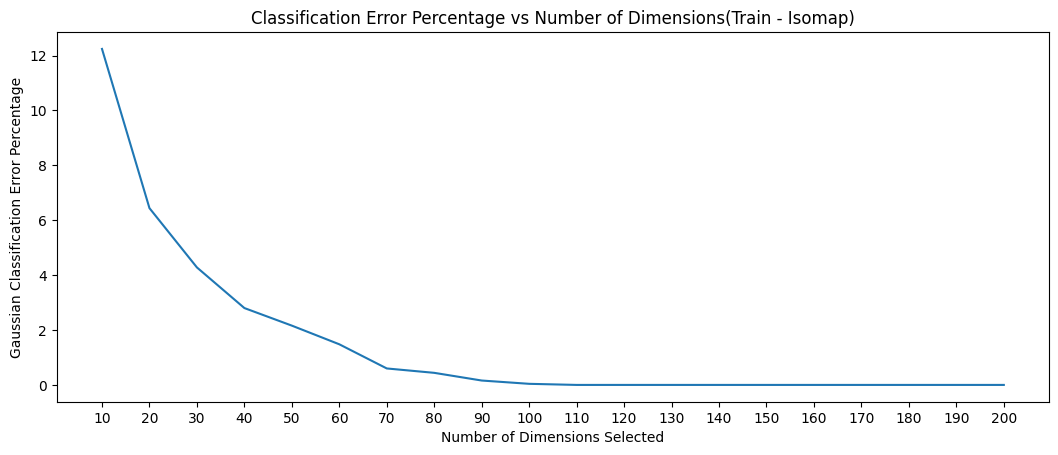

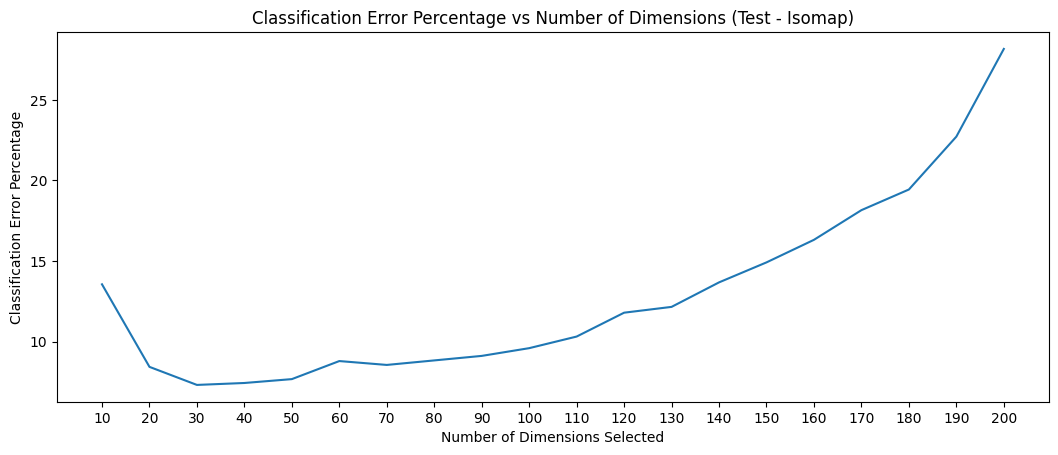

In [115]:
#5)  
iso_train_perc = (np.array(class_error_train))*100
iso_test_perc = (np.array(class_error_test))*100
k_components = [x for x in subspace_dimensions]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 2
plt.rcParams["figure.figsize"] = fig_size

plt.plot(k_components, iso_train_perc)
plt.xlabel('Number of Dimensions Selected')
plt.ylabel('Gaussian Classification Error Percentage')
plt.title('Classification Error Percentage vs Number of Dimensions(Train - Isomap)')
plt.xticks(range(10, 201, 10), range(10, 201, 10))
plt.show()

plt.plot(k_components, iso_test_perc)
plt.xlabel('Number of Dimensions Selected')
plt.ylabel('Classification Error Percentage')
plt.title('Classification Error Percentage vs Number of Dimensions (Test - Isomap)')
plt.xticks(range(10, 201, 10), range(10, 201, 10))
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)}) 

Question #3 t-SNE

In [125]:
tsne = TSNE(perplexity=40)
X_tsne = tsne.fit_transform(data_centered)

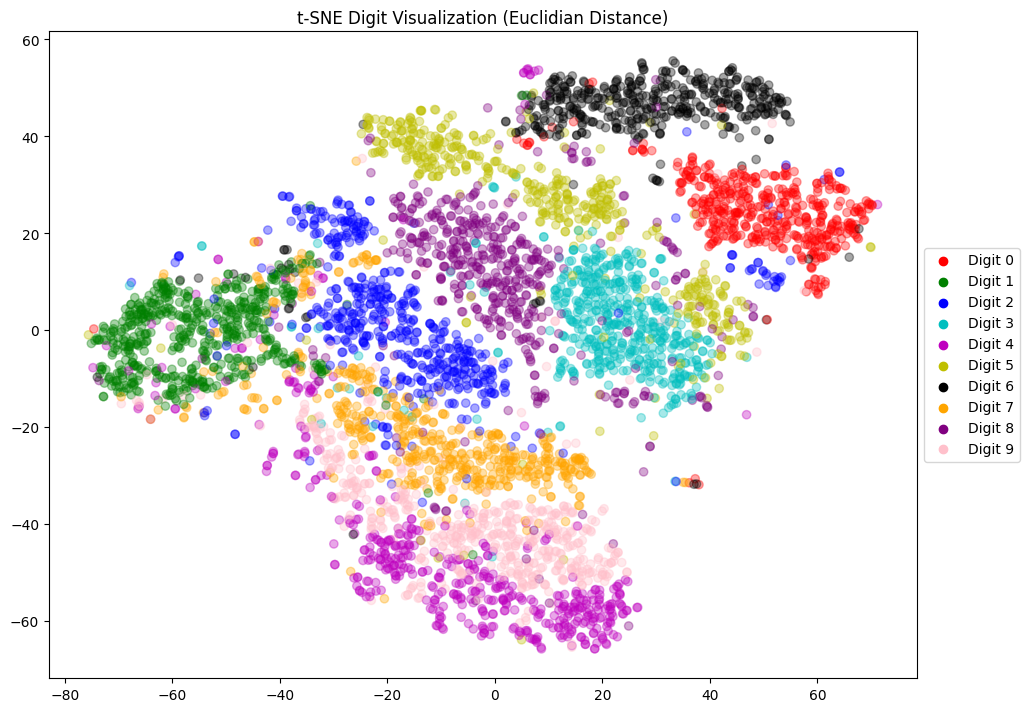

In [72]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 1.75
fig_size[1] = fig_size[1] * 1.75

plt.rcParams["figure.figsize"] = fig_size

scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c=[colors[label] for label in labels_data], alpha=0.35)
legend_elements = [plt.scatter([], [], c=colors[i], label='Digit {}'.format(i)) for i in range(len(colors))]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.00, 0.5))
plt.title('t-SNE Digit Visualization (Euclidian Distance)')
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)}) 

In [83]:
tsne_cos = TSNE(perplexity=40, metric='cosine')
X_tsne_cos = tsne_cos.fit_transform(data_centered)

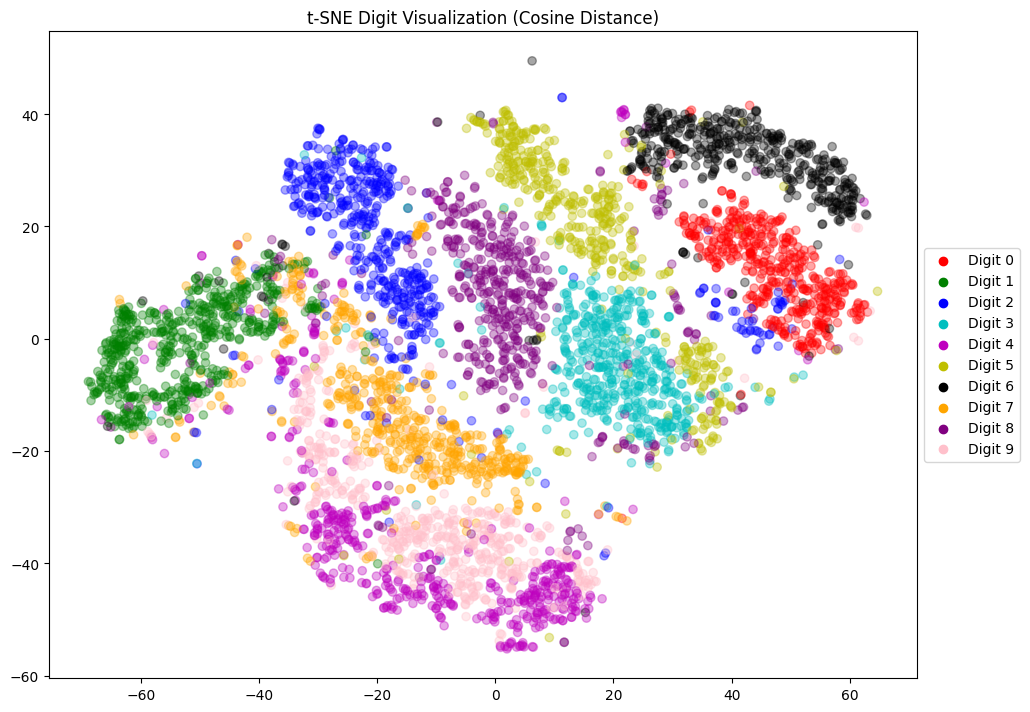

In [85]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink']

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = fig_size[0] * 1.75
fig_size[1] = fig_size[1] * 1.75

plt.rcParams["figure.figsize"] = fig_size

scatter = plt.scatter(X_tsne_cos[:, 0], X_tsne_cos[:, 1],c=[colors[label] for label in labels_data], alpha=0.35)
legend_elements = [plt.scatter([], [], c=colors[i], label='Digit {}'.format(i)) for i in range(len(colors))]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1.00, 0.5))
plt.title('t-SNE Digit Visualization (Cosine Distance)')
plt.show()

plt.rcParams.update({'figure.figsize': (6.4, 4.8)}) 